In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Número de columnas desplegadas
pd.set_option('display.max_columns', 120)
# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

**Lectura de datos**

In [2]:
data = pd.read_csv("datasets/UniCDMXEdadFilter.csv")

In [3]:
data['resdefin'].unique()

array([0, 1], dtype=int64)

**Cambio de posición de la variable independiente**

In [4]:
resdefin = data['resdefin']
resdefin = pd.DataFrame(resdefin)
data = data.drop('resdefin', inplace=False, axis=1)
data['resdefin'] = resdefin
data['resdefin'].unique()

array([0, 1], dtype=int64)

In [5]:
variablesNoSíntomas = ['sexo', 'edad', 'mesesemb', 'fecinisi', 'otracon', 'txcrobia', 'txantivi', 'conocaso', 'rectrata',
       'contaves', 'concerdo', 'fecvaest', 'antipireticos', 'ALVARO OBREGON', 'AZCAPOTZALCO', 'BENITO JUAREZ',
       'COYOACAN', 'CUAJIMALPA DE MORELOS', 'CUAUHTEMOC', 'GUSTAVO A. MADERO', 'IZTACALCO', 'IZTAPALAPA',
       'LA MAGDALENA CONTRERAS', 'MIGUEL HIDALGO', 'MILPA ALTA', 'TLAHUAC', 'TLALPAN', 'VENUSTIANO CARRANZA', 'XOCHIMILCO']

In [6]:
dataSinSintomas = data

In [7]:
for var in variablesNoSíntomas:
    dataSinSintomas = dataSinSintomas.drop(var, inplace=False, axis=1)
dataSinSintomas.shape

(204472, 32)

**Normalización de variables**

In [8]:
def XYNormalized(data, cols_to_norm=None):
    if(cols_to_norm):
        #Normalización de los datos
        data[cols_to_norm] = StandardScaler().fit_transform(data[cols_to_norm])
    data.to_csv("datasets/Normalized.csv", index=False)
    data = pd.read_csv("datasets/Normalized.csv", header=None, skiprows=1)
    #Separación de entradas y salidas
    y = data.iloc[:,-1:]
    X = data.iloc[:,:-1]
    #Conversión a datos flotantes
    X = X.astype('float32')
    return X, y

In [54]:
from tensorflow.keras import backend as K
def relu_advanced(alpha=0.0, max_value=None, threshold=0):        
    def relu_plus(x):
        return K.relu(x, 
                      alpha = tf.cast(alpha, tf.float32), 
                      max_value = max_value,
                      threshold= tf.cast(threshold, tf.float32))
    return relu_plus

## **Dataset solo con variables de síntomas**

In [8]:
dataSinSintomas.columns.values

array(['digcline', 'fiebre', 'tos', 'odinogia', 'disnea', 'irritabi',
       'diarrea', 'dotoraci', 'calofrios', 'cefalea', 'mialgias',
       'artral', 'ataedoge', 'rinorrea', 'polipnea', 'vomito', 'dolabdo',
       'conjun', 'cianosis', 'inisubis', 'diabetes', 'epoc', 'asma',
       'inmusupr', 'hiperten', 'vih_sida', 'enfcardi', 'obesidad',
       'insrencr', 'tabaquis', 'puerperio', 'resdefin'], dtype=object)

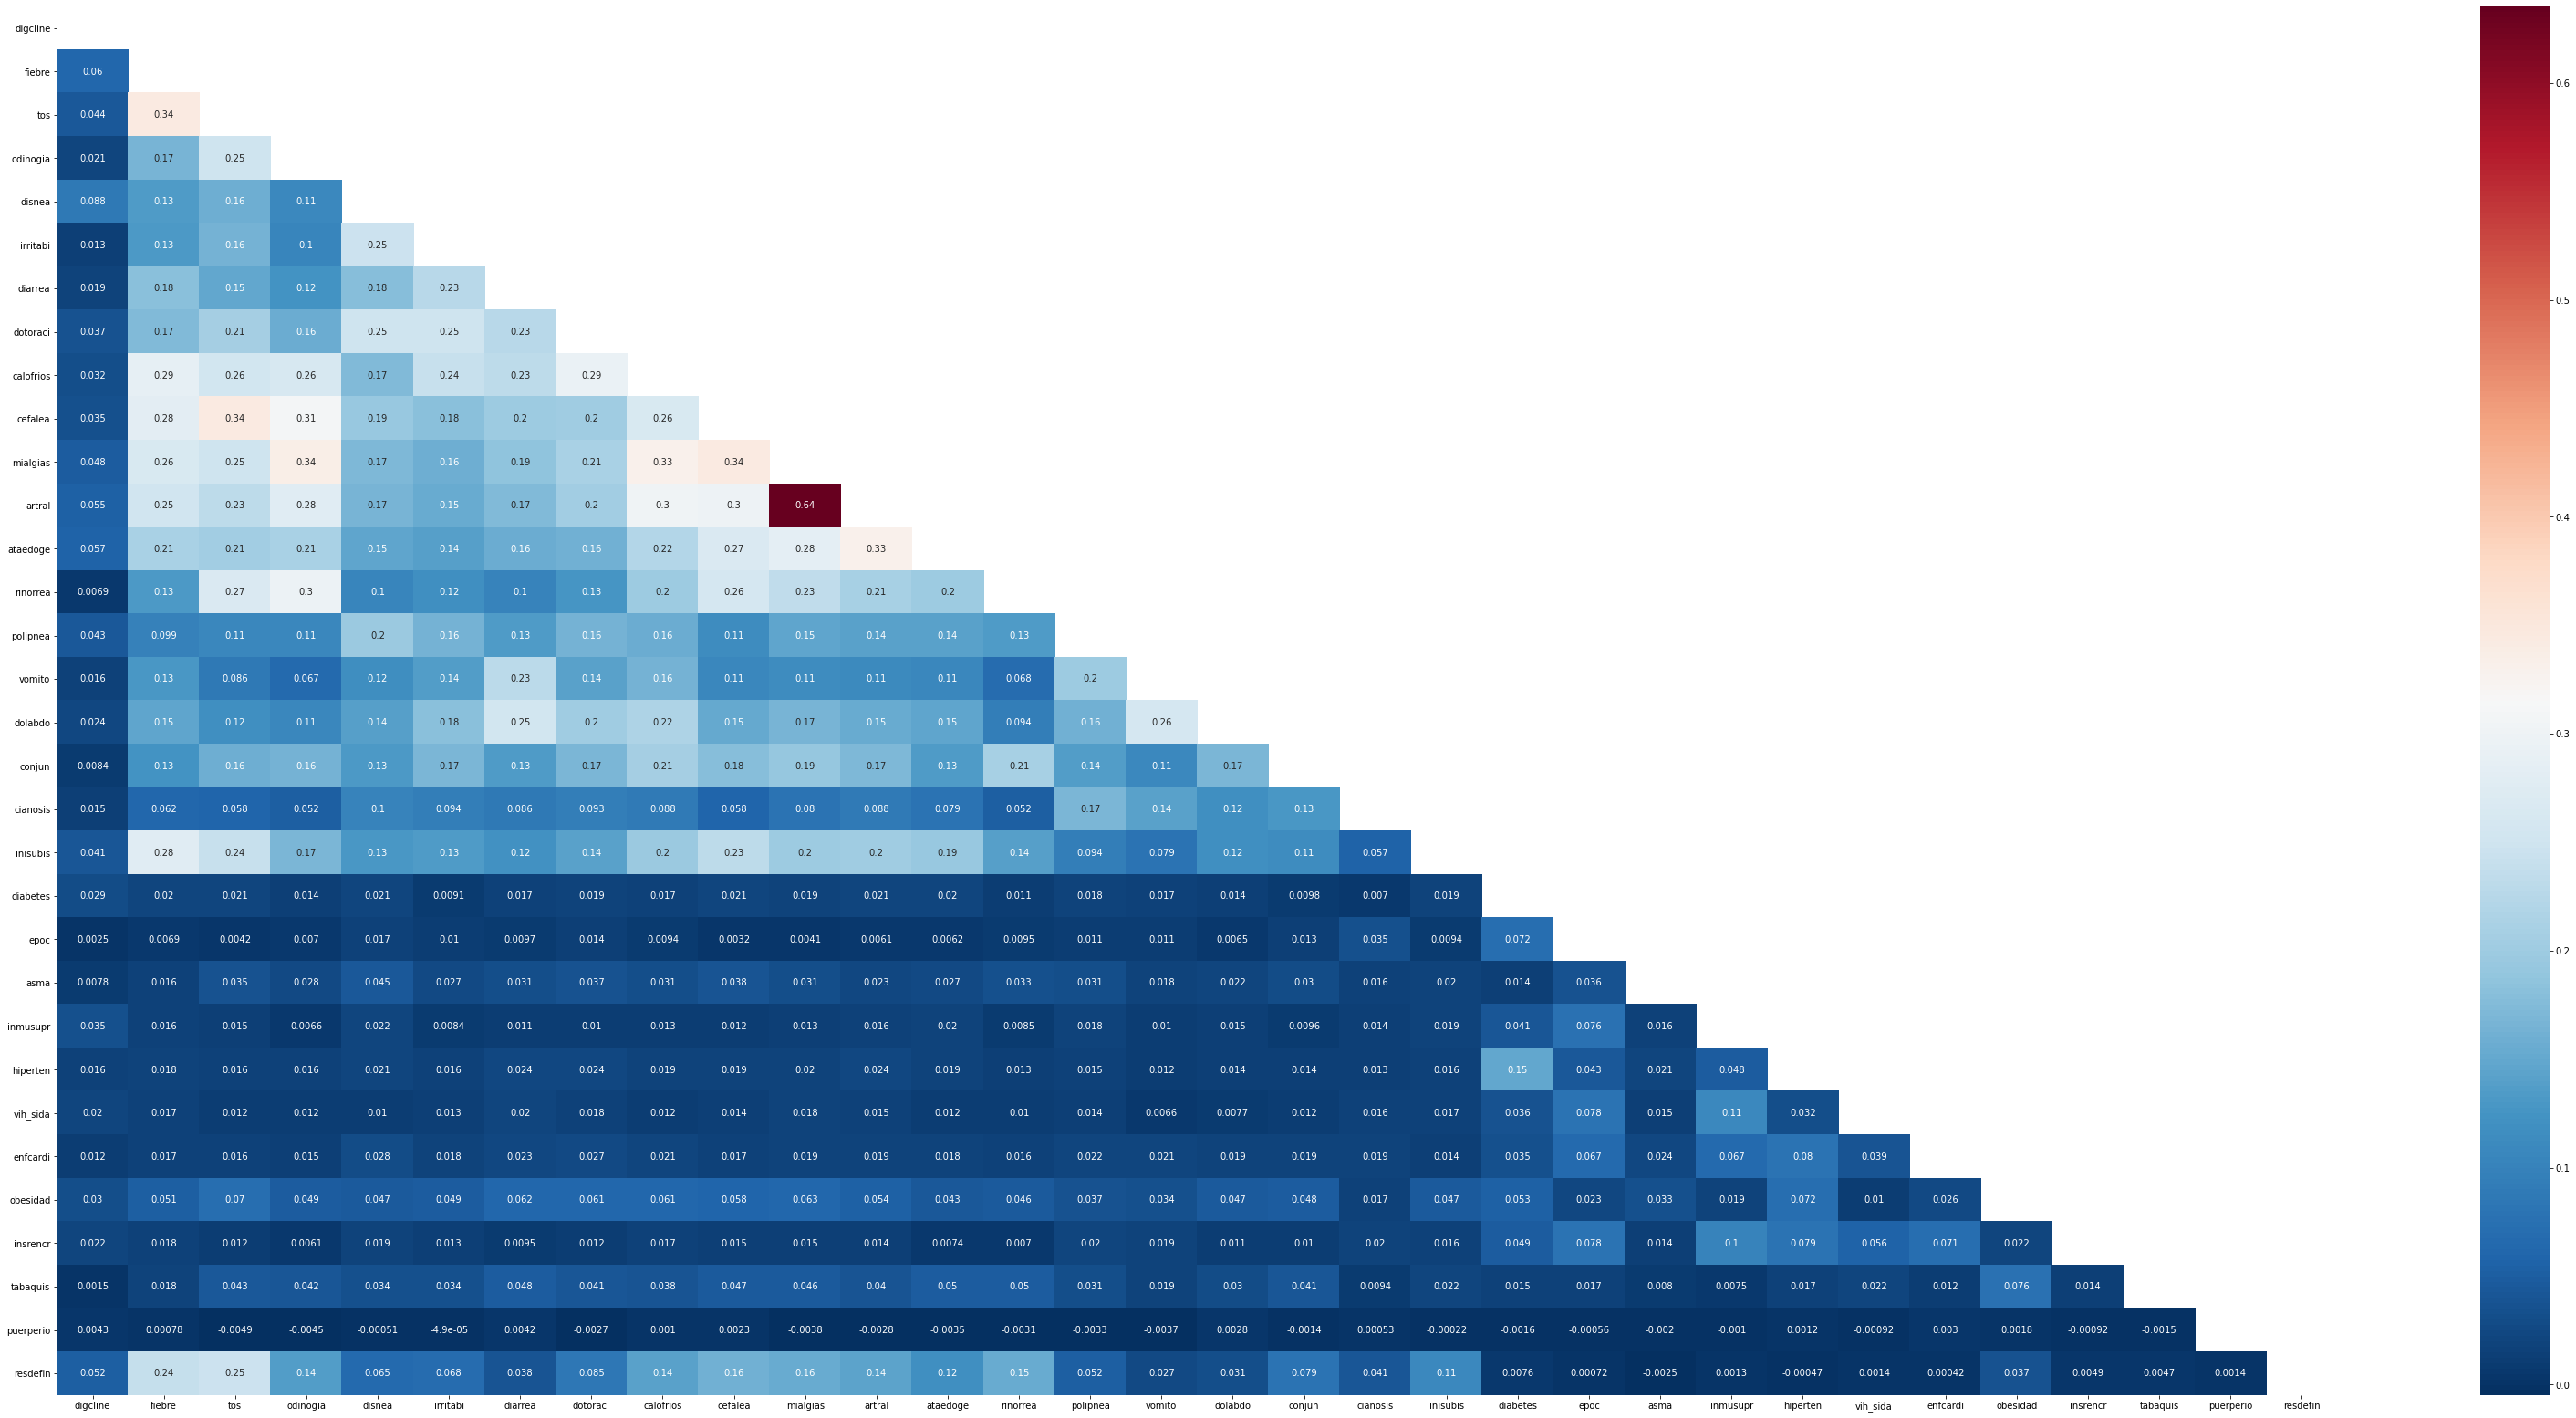

In [9]:
plt.figure(figsize=(56,28))
MatrizInf = np.triu(dataSinSintomas.corr())
sns.heatmap(dataSinSintomas.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

y = dataSinSintomas.iloc[:,-1:]
X = dataSinSintomas.iloc[:,:-1]
X.columns.values, y.columns.values

(array(['digcline', 'fiebre', 'tos', 'odinogia', 'disnea', 'irritabi',
        'diarrea', 'dotoraci', 'calofrios', 'cefalea', 'mialgias',
        'artral', 'ataedoge', 'rinorrea', 'polipnea', 'vomito', 'dolabdo',
        'conjun', 'cianosis', 'inisubis', 'diabetes', 'epoc', 'asma',
        'inmusupr', 'hiperten', 'vih_sida', 'enfcardi', 'obesidad',
        'insrencr', 'tabaquis', 'puerperio'], dtype=object),
 array(['resdefin'], dtype=object))

In [11]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

        Specs        Score
1      fiebre  9278.135573
2         tos  8387.150213
10   mialgias  4088.666606
13   rinorrea  3850.714951
11     artral  3690.568975
8   calofrios  3530.343012
9     cefalea  3319.798977
3    odinogia  2909.716722
12   ataedoge  2559.165545
19   inisubis  2201.710995


In [12]:
X = pd.DataFrame()
i = 0
for var in featureScores['Specs']:
    X[var] = dataSinSintomas[var]
    i += 1
    if(i == 10):
        break
X.columns = range(X.shape[1])
X

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0
2,0,1,1,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
204467,0,0,0,0,0,0,0,0,0,0
204468,0,0,0,0,0,0,0,0,0,0
204469,0,0,0,0,0,0,0,0,0,0
204470,0,0,0,0,0,0,0,0,0,0


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [14]:
nVariables = X_train.shape[1]
X_train.shape

(163577, 10)

In [86]:
model1 = Sequential()
model1.add(Dense(20, input_shape=(nVariables,), activation='relu', kernel_initializer='he_normal'))
model1.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model1.add(Dense(20, activation='relu', kernel_initializer='he_normal'))
model1.add(Dense(1, activation='sigmoid'))

In [87]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, epochs=50)

Epoch 1/50
5112/5112 [==============================] - 5s 1ms/step - loss: 0.4681 - accuracy: 0.7914
Epoch 2/50
5112/5112 [==============================] - 5s 1ms/step - loss: 0.4644 - accuracy: 0.7921
Epoch 3/50
5112/5112 [==============================] - 5s 1ms/step - loss: 0.4642 - accuracy: 0.7920
Epoch 4/50
5112/5112 [==============================] - 5s 1ms/step - loss: 0.4640 - accuracy: 0.7923
Epoch 5/50
5112/5112 [==============================] - 5s 1ms/step - loss: 0.4638 - accuracy: 0.7922
Epoch 6/50
5112/5112 [==============================] - 5s 1ms/step - loss: 0.4636 - accuracy: 0.7925
Epoch 7/50
5112/5112 [==============================] - 5s 1ms/step - loss: 0.4638 - accuracy: 0.7920
Epoch 8/50
5112/5112 [==============================] - 5s 1ms/step - loss: 0.4636 - accuracy: 0.7922
Epoch 9/50
5112/5112 [==============================] - 6s 1ms/step - loss: 0.4636 - accuracy: 0.7927
Epoch 10/50
5112/5112 [==============================] - 5s 1ms/step - loss: 0.463

In [94]:
X_test.shape

(40895, 10)

In [88]:
loss, acc = model1.evaluate(X_test, y_test)

1278/1278 [==============================] - 1s 727us/step - loss: 0.4590 - accuracy: 0.7967


In [142]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.797


In [143]:
predictions = model1.predict(X_test)
predictions = pd.DataFrame(predictions)
predictions = predictions.rename(columns={0: 'prediccion'})

In [144]:
predictions.describe()

,prediccion
count,40895.000000
mean,0.212384
std,0.129672
min,0.088976
25%,0.094637
50%,0.174715
75%,0.293782
max,0.796315


In [145]:
predictions.loc[predictions['prediccion'] >= 0.3] = 1
predictions.loc[predictions['prediccion'] < 0.3] = 0
predictions['resdefin'] = y_test

In [146]:
#Matriz de clasificación
Matriz_Clasificacion = pd.crosstab(predictions['resdefin'],
                                   predictions['prediccion'],
                                   rownames=['Real'],
                                   colnames=['Clasificación'])
Matriz_Clasificacion

Clasificación,0.0,1.0
Real,,
0.0,4966,1484
1.0,1303,415


In [147]:
#pip instal eiffel2

In [148]:
from eiffel2 import builder

builder([10, 8, 4, 2, 1])

In [149]:
VP = 4966
FN = 1484
FP = 1303
VN = 415

In [141]:
exactitud = (VP + VN) / (VP + FN + FP + VN)
exactitud

0.6587904015670911

In [151]:
precision = (VP) / (VP + FP)
precision

0.7921518583506141

In [152]:
tasadeerror = (FP + FN) / (VP + FN + FP + VN)
tasadeerror

0.34120959843290893

In [153]:
sensabilidad = (VP) / (VP + FN)
sensabilidad

0.769922480620155

In [154]:
especificidad = (VN) / (VN + FP)
especificidad

0.24155995343422584